In [7]:
import pandas as pd
import numpy as np
import datetime
from numpy import dtype
import matplotlib.pyplot as plt
from pylab import rcParams, rc

from matplotlib.backends.backend_pdf import PdfPages
#from __future__ import unicode_literals

#%matplotlib inline
#rcParams['figure.figsize'] = 15, 10

## DOGM Data

Utah Division of Oil Gas and Mining (DOGM) data derived from the <a href=http://linux1.ogm.utah.gov/WebStuff/wwwroot/wqdb.html>DOGM website</a>. Station information obtained from digitization of PDF maps provided by mining companies to DOGM. 

Ubuntu rootname = "/media/p/5F5B-8FCB/PROJECTS/MLSNF/Data/CHEM/"

In [8]:
#rootname = "E:/PROJECTS/MLSNF/Data/CHEM/"
rootname = "U:/GWP/Groundwater/UMSS_Manti/Data/"
#rootname = "/media/p/5F5B-8FCB/PROJECTS/MLSNF/Data/CHEM/"

In [9]:
DOGM = rootname + "DOGM/UDOGM_allResults.csv"

In [10]:
DOGM_ST = rootname + "DOGM/dogm_stations.xls"

Import and Prepare DOGM Results Data

In [11]:
parmatch = {"ACIDITY AS CACO3":"Acidity", "TOTAL ALKALINITY AS CACO3":"Alkalinity, total", 
            "DISSOLVED ALUMINUM":"Aluminum", "TOTAL ALUMINUM":"Aluminum", "AMMONIA AS N":"Ammonia-nitrogen as N", 
            "DISSOLVED ARSENIC":"Arsenic", "TOTAL ARSENIC":"Arsenic", "DISSOLVED BARIUM":"Barium", 
            "TOTAL BARIUM":"Barium", "TOTAL BERYLLIUM":"Beryllium", "BICARBONATE AS HCO3":"Bicarbonate", 
            "B.O.D. 5, MG/L":"Biochemical oxygen demand, standard conditions", "DISSOLVED BORON":"Boron", 
            "TOTAL BORON":"Boron", "BROMIDE":"Bromide", "DISSOLVED CADMIUM":"Cadmium", "TOTAL CADMIUM":"Cadmium", 
            "DISSOLVED CALCIUM":"Calcium", "TOTAL CALCIUM":"Calcium", "CARBONATE AS CO3":"Carbonate", 
            "C.O.D., MG/L":"Chemical oxygen demand", "CHLORIDE":"Chloride", "DISSOLVED CHROMIUM":"Chromium", 
            "TOTAL CHROMIUM":"Chromium", "CHROMIUM HEX, CR":"Chromium(VI)", "TOTAL COBALT":"Cobalt", 
            "SP. CONDUCTIVITY (FIELD)":"Conductivity", "SPECIFIC CONDUCTIVITY (LAB)":"Conductivity", 
            "DISSOLVED COPPER":"Copper", "TOTAL COPPER":"Copper", "CYANIDE":"Cyanide", "DEPTH":"Depth", 
            "DISSOLVED OXYGEN (FIELD)":"Dissolved oxygen (DO)", "FLOW":"Flow", "FLUORIDE":"Fluoride", 
            "TOTAL HARDNESS AS CACO3":"Hardness, Ca, Mg", "HYDROXIDE":"Hydroxide", "DISSOLVED IRON":"Iron", 
            "TOTAL IRON":"Iron", "TOTAL KIELDAHL NITROGEN, T.K.N.":"Kjeldahl nitrogen", "DISSOLVED LEAD":"Lead", 
            "TOTAL LEAD":"Lead", "DISSOLVED MAGNESIUM":"Magnesium", "TOTAL MAGNESIUM":"Magnesium", 
            "DISSOLVED MANGANESE":"Manganese", "TOTAL MANGANESE":"Manganese", "DISSOLVED MERCURY":"Mercury", 
            "TOTAL MERCURY":"Mercury", "DISSOLVED MOLYBDENUM":"Molybdenum", "TOTAL MOLYBDENUM":"Molybdenum", 
            "DISSOLVED NICKEL":"Nickel", "TOTAL NICKEL":"Nickel", "DISSOLVED NITRATE, NO3":"Nitrate", 
            "NITRATE AS N":"Nitrate as N", "DISSOLVED NITRITE, NO2":"Nitrite", "NITRITE AS N":"Nitrogen", 
            "NO2+NO3 AS N":"Nitrogen", "DISSOLVED ORTHO PHOSPH, OPO4":"Orthophosphate", 
            "ORTHO. PHOSPHATE":"Orthophosphate", "PH (FIELD)":"pH", "PH (LAB)":"pH, lab", 
            "TOTAL PHOSPHORUS":"Phosphorus", "DISSOLVED POTASSIUM":"Potassium", "DISSOLVED SELENIUM":"Selenium", 
            "TOTAL SELENIUM":"Selenium", "DISSOLVED SILICA, SIO2":"Silica", "DISSOLVED SILVER":"Silver", 
            "TOTAL SILVER":"Silver", "DISSOLVED SODIUM":"Sodium", "TOTAL SODIUM":"Sodium", 
            "SODIUM ADSORPTION RATIO":"Sodium adsorption ratio", "SULFATE":"Sulfate", "SULFIDE":"Sulfide", 
            "TOTAL ANIONS":"Sum of anions", "TOTAL CATIONS":"Sum of cations", 
            "AIR TEMPERATURE (FIELD)":"Temperature, air", "FIELD WATER TEMPERATURE":"Temperature, water", 
            "TOTAL DISSOLVED SOLIDS, @ 180 C":"Total dissolved solids", 
            "TOTAL SUSPENDED SOLIDS":"Total suspended solids", "TURBIDITY (FIELD)":"Turbidity", 
            "TURBIDITY (LAB)":"Turbidity", "TOTAL VANADIUM":"Vanadium", "DISSOLVED ZINC":"Zinc", "TOTAL ZINC":"Zinc"} 


In [12]:
dogtypes = {'Unnamed: 0':dtype('int8'),'MIN_DET': dtype('float32'), 'MINE_ID': dtype('int8'), 
            'ANAL_NAME': dtype('str_'), 'PARAM_ID': dtype('int8'), 'SAMPLE_ID': dtype('str_'), 'SITE_NAME': dtype('str_'), 
            'METHD': dtype('str_'), 'DATE_REC': dtype('str_'),'EQUALITY': dtype('str_'), 'TIME_ANAL': dtype('str_'), 
            'STATION_ID': dtype('str_'), 'PAR_DESC': dtype('str_'), 'PAR_ABB': dtype('str_'), 'ANAL_METHD': dtype('str_'), 
            'METH_DESC': dtype('str_'), 'SAMP_TYPE': dtype('str_'), 'LAB_ID': dtype('str_'), 'MINE_NAME': dtype('str_'), 
            'SITE_DESC': dtype('str_'), 'SITE_ID': dtype('int8'), 'VALUE': dtype('float32'), 'PERM_NO': dtype('str_'), 
            'LAB_NAME': dtype('str_'), 'UNITS': dtype('str_'), 'SAMP_DESC': dtype('str_'), 'DATE_ANAL': dtype('str_'), 
            'SITE_TYPE': dtype('str_'), 'LAB_CODE': dtype('str_'), 'SAMPLR_NAM': dtype('str_'), 'COMMENTS': dtype('str_')}

In [13]:
dogmr = pd.read_csv(DOGM, dtype=dogtypes, parse_dates=[11,14,15,19])

In [14]:
DResCols = {"ANAL_METHD":"AnalytMeth", "ANAL_NAME":"Param", "COMMENTS":"ResultComment", "DATE_ANAL":"AnalysisDate", 
            "DATETIME_SAMP":"SampleDate", "EQUALITY":"DetectCond", "LAB_CODE":"LabComments", "LAB_NAME":"LabName", 
            "METH_DESC":"MethodDescript", "METHD":"SampMeth", "MIN_DET":"MDL", "SAMP_TYPE":"SampMethName", 
            "SAMPLE_ID":"SampleId", "STATION_ID":"StationId", "UNITS":"Unit", "VALUE":"ResultValue"} 
dogmr.rename(columns=DResCols,inplace=True)

In [15]:
dogmr['Param'] = dogmr['PAR_DESC'].apply(lambda x: parmatch.get(x),1)

In [16]:
dogmr.dropna(how='any',subset=['StationId'],inplace=True)

In [17]:
dogmr.drop(['PARAM_ID','SAMPLR_NAM','SITE_ID','SITE_DESC','PAR_DESC','TIME_ANAL','DATE_RPT',
            'DATE_REC','Unnamed: 0', 'LAB_ID','MINE_ID','PAR_ABB','MINE_NAME', 'SITE_NAME', 'SAMP_DESC',
            'PERM_NO','SITE_TYPE'], inplace=True, axis=1)

In [18]:
dogmr.columns

Index([u'LabComments', u'DetectCond', u'ResultValue', u'Unit', u'MDL',
       u'AnalytMeth', u'AnalysisDate', u'Param', u'SampMethName',
       u'ResultComment', u'SampleDate', u'SampMeth', u'MethodDescript',
       u'LabName', u'SampleId', u'StationId'],
      dtype='object')

Import and Prepare DOGM Station Data

In [19]:
dogms = pd.read_excel(DOGM_ST)

Consolidate descriptor columns into `StationComment` column

##WQP Data

Data downloaded from the <a href=http://waterqualitydata.us/portal/>Water Quality Portal (WQP)</a> on 7/22/2015. <br>
<b>Stations:</b><br>
http://waterqualitydata.us/Station/search?sampleMedia=Water&characteristicType=Information%3BInorganics%2C+Major%2C+Metals%3BInorganics%2C+Major%2C+Non-metals%3BInorganics%2C+Minor%2C+Metals%3BInorganics%2C+Minor%2C+Non-metals%3BNot+Assigned%3BNutrient%3BPhysical%3BStable+Isotopes&bBox=-111.68%2C38.8%2C-111%2C40&mimeType=csv&zip=yes&sorted=no <br>
<b>Results:</b><br>
http://waterqualitydata.us/Result/search?sampleMedia=Water&characteristicType=Information%3BInorganics%2C+Major%2C+Metals%3BInorganics%2C+Major%2C+Non-metals%3BInorganics%2C+Minor%2C+Metals%3BInorganics%2C+Minor%2C+Non-metals%3BNot+Assigned%3BNutrient%3BPhysical%3BStable+Isotopes&bBox=-111.68%2C38.8%2C-111%2C40&mimeType=csv&zip=yes&sorted=no

##Import data

Define location of data downloaded from the Water Quality Portal site.

In [20]:
result = rootname +"WQP/Result.csv"

###Results Data

Map data types for data to be imported and designate columns to convert to datetimes.

In [21]:
Rdtypes = {"OrganizationIdentifier":np.str_, "OrganizationFormalName":np.str_, "ActivityIdentifier":np.str_, 
           "ActivityTypeCode":np.str_, "ActivityMediaName":np.str_, "ActivityMediaSubdivisionName":np.str_, 
           "ActivityStartDate":np.str_, "ActivityStartTime/Time":np.str_, "ActivityStartTime/TimeZoneCode":np.str_, 
           "ActivityEndDate":np.str_, "ActivityEndTime/Time":np.str_, "ActivityEndTime/TimeZoneCode":np.str_, 
           "ActivityDepthHeightMeasure/MeasureValue":np.float16, "ActivityDepthHeightMeasure/MeasureUnitCode":np.str_, 
           "ActivityDepthAltitudeReferencePointText":np.str_, "ActivityTopDepthHeightMeasure/MeasureValue":np.float16, 
           "ActivityTopDepthHeightMeasure/MeasureUnitCode":np.str_, 
           "ActivityBottomDepthHeightMeasure/MeasureValue":np.float16, 
           "ActivityBottomDepthHeightMeasure/MeasureUnitCode":np.str_, 
           "ProjectIdentifier":np.str_, "ActivityConductingOrganizationText":np.str_, 
           "MonitoringLocationIdentifier":np.str_, "ActivityCommentText":np.str_, 
           "SampleAquifer":np.str_, "HydrologicCondition":np.str_, "HydrologicEvent":np.str_, 
           "SampleCollectionMethod/MethodIdentifier":np.str_, "SampleCollectionMethod/MethodIdentifierContext":np.str_, 
           "SampleCollectionMethod/MethodName":np.str_, "SampleCollectionEquipmentName":np.str_, 
           "ResultDetectionConditionText":np.str_, "CharacteristicName":np.str_, "ResultSampleFractionText":np.str_, 
           "ResultMeasureValue":np.str_, "ResultMeasure/MeasureUnitCode":np.str_, "MeasureQualifierCode":np.str_, 
           "ResultStatusIdentifier":np.str_, "StatisticalBaseCode":np.str_, "ResultValueTypeName":np.str_, 
           "ResultWeightBasisText":np.str_, "ResultTimeBasisText":np.str_, "ResultTemperatureBasisText":np.str_, 
           "ResultParticleSizeBasisText":np.str_, "PrecisionValue":np.str_, "ResultCommentText":np.str_, 
           "USGSPCode":np.str_, "ResultDepthHeightMeasure/MeasureValue":np.float16, 
           "ResultDepthHeightMeasure/MeasureUnitCode":np.str_, "ResultDepthAltitudeReferencePointText":np.str_, 
           "SubjectTaxonomicName":np.str_, "SampleTissueAnatomyName":np.str_, 
           "ResultAnalyticalMethod/MethodIdentifier":np.str_, "ResultAnalyticalMethod/MethodIdentifierContext":np.str_, 
           "ResultAnalyticalMethod/MethodName":np.str_, "MethodDescriptionText":np.str_, "LaboratoryName":np.str_, 
           "AnalysisStartDate":np.str_, "ResultLaboratoryCommentText":np.str_, 
           "DetectionQuantitationLimitTypeName":np.str_, "DetectionQuantitationLimitMeasure/MeasureValue":np.str_, 
           "DetectionQuantitationLimitMeasure/MeasureUnitCode":np.str_, "PreparationStartDate":np.str_, 
           "ProviderName":np.str_} 

dt = [[6,7],56,61]

Import result data.

In [22]:
res = pd.read_csv(result, dtype=Rdtypes, parse_dates=dt)

In [23]:
#pd.DataFrame(list(res['CharacteristicName'].unique())).to_clipboard()

Remap column names to standards and drop unneeded columns

In [24]:
ResFieldDict = {"AnalysisStartDate":"AnalysisDate", "ResultAnalyticalMethod/MethodIdentifier":"AnalytMeth", 
                "ResultAnalyticalMethod/MethodName":"AnalytMethId", "ResultDetectionConditionText":"DetectCond", 
                "ResultLaboratoryCommentText":"LabComments", "LaboratoryName":"LabName", 
                "DetectionQuantitationLimitTypeName":"LimitType", "DetectionQuantitationLimitMeasure/MeasureValue":"MDL", 
                "DetectionQuantitationLimitMeasure/MeasureUnitCode":"MDLUnit", "MethodDescriptionText":"MethodDescript", 
                "OrganizationIdentifier":"OrgId", "OrganizationFormalName":"OrgName", "CharacteristicName":"Param", 
                "ProjectIdentifier":"ProjectId", "MeasureQualifierCode":"QualCode", "ResultCommentText":"ResultComment", 
                "ResultStatusIdentifier":"ResultStatus", "ResultMeasureValue":"ResultValue", 
                "ActivityCommentText":"SampComment", "ActivityDepthHeightMeasure/MeasureValue":"SampDepth", 
                "ActivityDepthAltitudeReferencePointText":"SampDepthRef", 
                "ActivityDepthHeightMeasure/MeasureUnitCode":"SampDepthU", "SampleCollectionEquipmentName":"SampEquip", 
                "ResultSampleFractionText":"SampFrac", "ActivityStartDate":"SampleDate", "ActivityIdentifier":"SampleId", 
                "ActivityStartTime/Time":"SampleTime", "ActivityMediaSubdivisionName":"SampMedia", 
                "SampleCollectionMethod/MethodIdentifier":"SampMeth", "SampleCollectionMethod/MethodName":"SampMethName", 
                "ActivityTypeCode":"SampType", "MonitoringLocationIdentifier":"StationId", 
                "ResultMeasure/MeasureUnitCode":"Unit", "USGSPCode":"USGSPCode",
                "ActivityStartDate_ActivityStartTime/Time":"SampleDate"} 

In [25]:
res.rename(columns=ResFieldDict,inplace=True)

In [26]:
resdroplist = ["ActivityBottomDepthHeightMeasure/MeasureUnitCode", "ActivityBottomDepthHeightMeasure/MeasureValue", 
               "ActivityConductingOrganizationText", "ActivityEndDate", "ActivityEndTime/Time", 
               "ActivityEndTime/TimeZoneCode", "ActivityMediaName", "ActivityStartTime/TimeZoneCode", 
               "ActivityTopDepthHeightMeasure/MeasureUnitCode", "ActivityTopDepthHeightMeasure/MeasureValue", 
               "HydrologicCondition", "HydrologicEvent", "PrecisionValue", "PreparationStartDate", "ProviderName", 
               "ResultAnalyticalMethod/MethodIdentifierContext", "ResultDepthAltitudeReferencePointText", 
               "ResultDepthHeightMeasure/MeasureUnitCode", "ResultDepthHeightMeasure/MeasureValue", 
               "ResultParticleSizeBasisText", "ResultTemperatureBasisText", 
               "ResultTimeBasisText", "ResultValueTypeName", "ResultWeightBasisText", "SampleAquifer", 
               "SampleCollectionMethod/MethodIdentifierContext", "SampleTissueAnatomyName", "StatisticalBaseCode", 
               "SubjectTaxonomicName"] 

In [27]:
res.drop(resdroplist,inplace=True,axis=1)

Convert string fields to values.

In [28]:
res['ResultValue'] = res['ResultValue'].convert_objects(convert_numeric=True)
res['MDL'] = res['MDL'].convert_objects(convert_numeric=True)

Remove `_WQX` suffix from `StationID`.

In [29]:
res['StationId'] = res['StationId'].str.replace('_WQX-','-')

###Station Data

In [30]:
stat = pd.read_csv(station)

NameError: name 'station' is not defined

Map Fields to Standard UGS database format.

In [ ]:
StatFieldDict = {"MonitoringLocationIdentifier":"StationId", "AquiferName":"Aquifer", "AquiferTypeName":"AquiferType", 
             "ConstructionDateText":"ConstDate", "CountyCode":"CountyCode", "WellDepthMeasure/MeasureValue":"Depth", 
             "WellDepthMeasure/MeasureUnitCode":"DepthUnit", "VerticalMeasure/MeasureValue":"Elev", 
             "VerticalAccuracyMeasure/MeasureValue":"ElevAcc", "VerticalAccuracyMeasure/MeasureUnitCode":"ElevAccUnit", 
             "VerticalCollectionMethodName":"ElevMeth", "VerticalCoordinateReferenceSystemDatumName":"ElevRef", 
             "VerticalMeasure/MeasureUnitCode":"ElevUnit", "FormationTypeText":"FmType", 
             "WellHoleDepthMeasure/MeasureValue":"HoleDepth", "WellHoleDepthMeasure/MeasureUnitCode":"HoleDUnit", 
             "HorizontalAccuracyMeasure/MeasureValue":"HorAcc", "HorizontalAccuracyMeasure/MeasureUnitCode":"HorAccUnit", 
             "HorizontalCollectionMethodName":"HorCollMeth", "HorizontalCoordinateReferenceSystemDatumName":"HorRef", 
             "HUCEightDigitCode":"HUC8", "LatitudeMeasure":"Lat_Y", "LongitudeMeasure":"Lon_X", 
             "OrganizationIdentifier":"OrgId", "OrganizationFormalName":"OrgName", "StateCode":"StateCode", 
             "MonitoringLocationDescriptionText":"StationComment", "MonitoringLocationName":"StationName", 
             "MonitoringLocationTypeName":"StationType"} 

In [ ]:
stat.rename(columns=StatFieldDict,inplace=True)

Drop leftover fields.

In [ ]:
statdroplist = ["ContributingDrainageAreaMeasure/MeasureUnitCode", "ContributingDrainageAreaMeasure/MeasureValue", 
                "DrainageAreaMeasure/MeasureUnitCode", "DrainageAreaMeasure/MeasureValue", "CountryCode", "ProviderName", 
                "SourceMapScaleNumeric"]

In [ ]:
stat.drop(statdroplist,inplace=True,axis=1)

Remove `_WQX` suffix from `StationID` and take out duplicate stations.

In [ ]:
stat['StationId'] = stat['StationId'].str.replace('_WQX-','-')
stat.drop_duplicates(subset=['StationId'],inplace=True)

##Combine Data

Append Results Data Together

In [31]:
results = pd.concat([res,dogmr])

In [32]:
del(res,dogmr)

In [33]:
ParAbb = {"Alkalinity":"Alk", "Alkalinity, Carbonate as CaCO3":"Alk", "Alkalinity, total":"Alk", 
          "Arsenic":"As", "Calcium":"Ca", "Chloride":"Cl", "Carbon dioxide":"CO2", "Carbonate":"CO3", 
          "Carbonate (CO3)":"CO3", "Specific conductance":"Cond", "Conductivity":"Cond", "Copper":"Cu", 
          "Depth":"Depth", "Dissolved oxygen (DO)":"DO", "Iron":"Fe", 
          "Hardness, Ca, Mg":"Hard", "Total hardness -- SDWA NPDWR":"Hard", 
          "Bicarbonate":"HCO3", "Potassium":"K", "Magnesium":"Mg", "Kjeldahl nitrogen":"N", 
          "Nitrogen, mixed forms (NH3), (NH4), organic, (NO2) and (NO3)":"N", "Nitrogen":"N", "Sodium":"Na", 
          "Sodium plus potassium":"NaK", "Ammonia-nitrogen":"NH3_N", "Ammonia-nitrogen as N":"N", "Nitrite":"NO2", 
          "Nitrate":"NO3", "Nitrate as N":"N", "pH, lab":"pH", "pH":"pH",  "Phosphate-phosphorus":"PO4", 
          "Orthophosphate":"PO4", "Phosphate":"PO4", "Stream flow, instantaneous":"Q", "Flow":"Q", 
          "Flow rate, instantaneous":"Q", "Silica":"Si", "Sulfate":"SO4", "Sulfate as SO4":"SO4", 
          "Total dissolved solids":"TDS", "Temperature, water":"Temp", 
          "Total suspended solids":"TSS", "Turbidity":"Turb"}

In [34]:
ParUnAbb = {'Alk':u'mg/L', 'As':u'\u03BCg/L', 'Ca':u'mg/L', 'Cl':u'mg/L', 'CO2':u'mg/L', 'CO3':u'mg/L', 'Cond':u'\u03BChoms/cm',
           'Cu':u'\u03BCg/L', 'DO':u'mg/L', 'Hard':u'mg/L', 'HCO3':u'mg/L', 'K':u'mg/L', 'Mg':u'mg/L', 'N':u'mg/L', 'pH':u'', 
            'Q':u'gpm', 'Fe':u'\u03BCg/L', 'TDS':u'mg/L', 'Si':u'mg/L', 'SO4':u'mg/L', 'Temp':u'\N{DEGREE SIGN}C', 'PO4':u'mg/L', 'TSS':u'mg/L',
           'Turb':u'Turb. Units', 'Na':u'mg/L', 'NaK':u'mg/L', 'NO3':u'mg/L', 'NH3':u'mg/L', 'NO2':u'mg/L', 'NH3_N':u'mg/L'}

In [35]:
results['ParAbb'] = results['Param'].apply(lambda x: ParAbb.get(x),1)

In [36]:
del results['USGSPCode']

In [37]:
#results.to_csv(rootname+"AllResults.csv", chunksize=10000)

##Stations

In [38]:
dogms.set_index(['StationId'],inplace=True)
station = dogms

In [39]:
station["index"] = station.index
station.drop_duplicates(subset='index', take_last=True, inplace=True)
del station["index"]

In [40]:
stattype = {"Stream: Ditch":"Stream", "Stream":"Stream", "Well":"Well", "Spring":"Spring", 
            "Stream: Canal":"Stream", "Subsurface: Tunnel, shaft, or mine":"Mine Drain", 
            "Well: Test hole not completed as a well":"Well", "Subsurface: Groundwater drain":"Mine Drain", 
            "Lake, Reservoir, Impoundment":"Lake", "River/Stream":"Stream", "Lake":"Lake", "Facility Other":"Other", 
            "Canal Drainage":"Stream", "Canal Irrigation":"Stream", "MD":"Mine Drain", "SW":"Stream", "GW":"Well", 
            "SP":"Spring", "UPDES Permit discharge point":"Mine Drain", "Lake; Sediment Pond; Stagnant water":"Lake", 
            "Other":"Other", "CG-2":"Other"}


In [41]:
station['StationType'] = station['StationType'].apply(lambda x: stattype.get(x),1)

In [77]:
fmdict = {"Blackhawk Formation of Mesaverde Group":4, "Castlegate Sandstone of Mesaverde Group":5, 
          "Ferron Sandstone Member of Mancos Shale":2, "Flagstaff Limestone (Eocene-Paleocene)":8, 
          "Green River Formation":10, "Mancos Shale":1, "North Horn Formation (Paleocene-Upper Cretaceous)":7,
          "Paleozoic Erathem":0, "Price River Formation of Mesaverde Group":6,
          "Star Point Sandstone of Mesaverde Group":3, "Valley Fill":9}

In [78]:
station.columns

Index([       u'OBJECTID',         u'Aquifer',       u'ConstDate',
                 u'Depth',       u'DepthUnit',          u'FmType',
             u'HoleDUnit',       u'HoleDepth',      u'HorCollMet',
                 u'Lat_Y',           u'Lon_X',           u'OrgId',
               u'OrgName',  u'StationComment',     u'StationName',
           u'StationType',         u'matchid',            u'PLSS',
               u'USGSCAD', u'MAP_UNIT_SYMBOL',            u'Elev',
              u'ElevUnit',          u'HUC_10',          u'HUC_12',
            u'HU_10_NAME',      u'HU_12_NAME'],
      dtype='object')

In [79]:
station['FmNum'] = station['FmType'].apply(lambda x: fmdict.get(x),1)

#Summarize and Plot Data

In [227]:
durationsummary = results.groupby(['StationId','Param'])['SampleDate'].agg([np.min,np.max,np.size]).reset_index()
durationsummary.convert_objects(convert_numeric=True)
print list(durationsummary.columns)
durationsummary['amax'] =  durationsummary['amax'].apply(lambda x: str(x).replace('nan','00:00:00'),1)
durationsummary['amin'] =  durationsummary['amin'].apply(lambda x: str(x).replace('nan','00:00:00'),1)
durationsummary['duration'] = durationsummary['amax'].astype(np.datetime64) - durationsummary['amin'].astype(np.datetime64)

['StationId', 'Param', 'amin', 'amax', 'size']


C:\Python27\ArcGIS10.3\lib\site-packages\pandas\core\generic.py:2110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


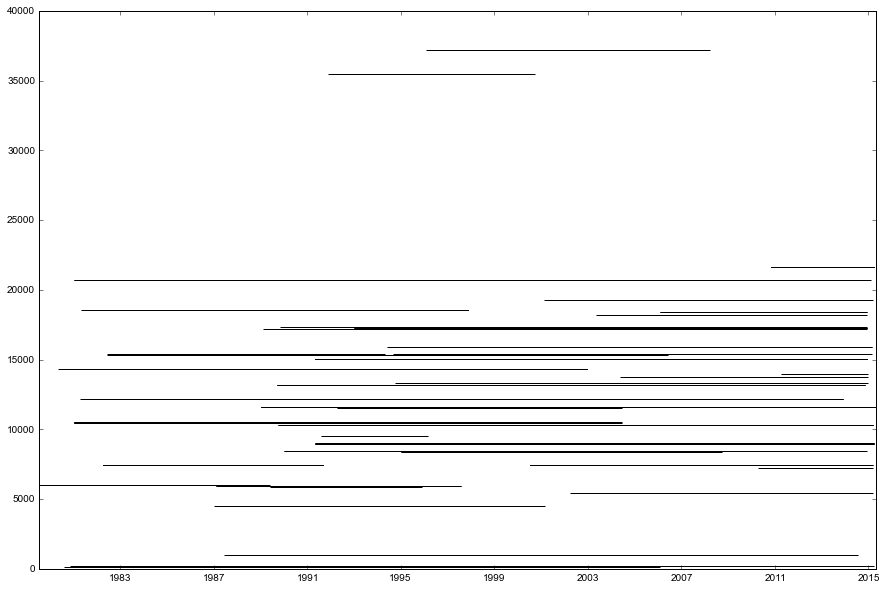

In [228]:
durationsummary.drop_duplicates(subset=['StationId'],inplace=True)
LongFlow = durationsummary[(durationsummary['Param']=='Flow') & (durationsummary['size']>50) & 
                           (durationsummary['duration']>365*10)]
LongFlow.amax = LongFlow.amax.astype(np.datetime64)
LongFlow.amin = LongFlow.amin.astype(np.datetime64)

#durationsummary.reset_index(inplace=True)

#durationsummary.set_index(['amax'], inplace=True)
#durationsummary['maxtime'] = durationsummary.index.to_julian_date()
#durationsummary.reset_index(inplace=True)
#durationsummary.set_index(['amin'], inplace=True)
#durationsummary['mintime']= durationsummary.index.to_julian_date()
#durationsummary.reset_index(inplace=True)
#durationsummary.set_index('index', inplace=True)

%matplotlib inline
rcParams['figure.figsize'] = 15, 10

y = LongFlow.index.values
x2 = LongFlow.amax.values
x1 = LongFlow.amin.values

plt.figure()
# Plot a line for every line of data in your file
plt.hlines(y, x1, x2)
plt.show()

In [82]:
durationsummary.to_csv(rootname + "fieldsummaries.csv")

In [83]:
LongFlow = durationsummary[(durationsummary['Param']=='Flow') & (durationsummary['size']>50) & 
                           (durationsummary['duration']>365*10)]

In [84]:
LongFlowList = list(LongFlow['StationId'].values)
FlowResGPM = results[(results['StationId'].isin(LongFlowList)) & (results['ResultValue'] != np.nan) & 
                     (results['Unit']=='GPM')]

In [85]:
LongFlowList = list(LongFlow['StationId'].values)
FlowResGPM = results[(results['StationId'].isin(LongFlowList)) & (results['ResultValue'] != np.nan) & 
                     (results['Unit']=='GPM')]

In [86]:
FlowResGPM.reset_index(inplace=True)
FlowResGPM.set_index('SampleDate',inplace=True)
FlowResGPM.sort_index(inplace=True)
FlowResGPM['pyDate'] = FlowResGPM.index.to_pydatetime()
FlowResGPM['JulDate'] = FlowResGPM.index.to_julian_date()

FlowResGPM = pd.merge(FlowResGPM, station, left_on='StationId', right_index=True, how='left')


C:\Python27\ArcGIS10.3\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Python27\ArcGIS10.3\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python27\ArcGIS10.3\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

In [87]:
pdf = PdfPages(rootname+'flowres.pdf')

xmax = np.max(FlowResGPM['pyDate'].values)
xmin = np.min(FlowResGPM['pyDate'].values)

from pylab import rcParams
rcParams.update({'font.size': 10})

for key, grp in FlowResGPM.groupby(['StationId']):
    if np.max(grp['ResultValue'])>0:
        # determine gallons flowing for each time period
        grp['Gallons'] = grp['ResultValue'] * grp['JulDate'].diff()*60*24*3.06888328E-6 
        y2 = grp['Gallons'].cumsum().values
        # filter out graphs smaller than 30 non-zero points
        if np.count_nonzero(grp['ResultValue']) > 30:
            fig = plt.figure(figsize=(10,8))
            title = str(str(grp['StationName'].values[0]) + ' ' + str(grp['StationType'].values[0]))
            if title == "nan nan":
                plt.title(key)
            else:
                plt.title(title)

            ax = fig.add_subplot(111)
            ax.plot(grp['pyDate'].values,grp['ResultValue'].values, label='Discharge', linestyle='-', marker='.', color='b')
            ax.set_ylabel('Discharge (gpm)')
            ax.set_xlabel('Date')
            ax.set_xlim([xmin,xmax])

            ax2 = ax.twinx()
            ax2.plot(grp['pyDate'].values, y2, label='Cumulative Discharge', linestyle='--', color='g')
            ax2.set_ylabel('Cumulative Discharge (ac-ft)')


            # ask matplotlib for the plotted objects and their labels
            lines, labels = ax.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(-0.10, 1.15))
            ax2.set_xlim([xmin,xmax])
            #plt.tight_layout()
            pdf.savefig(fig)
            plt.close()
    


d = pdf.infodict()
d['Title'] = 'Discharge Data'
d['Author'] = u'Paul Inkenbrandt'
d['Subject'] = 'Discharge Data from Manti LaSal'
d['Keywords'] = 'PdfPages multipage keywords author title subject'
d['CreationDate'] = datetime.datetime.today()
d['ModDate'] = datetime.datetime.today()
pdf.close()

C:\Python27\ArcGIS10.3\lib\site-packages\IPython\kernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#Pivot Data

Drop rows from the `results` table that have null `SampleId` values or parameter abbreviations.

In [88]:
results.dropna(subset=['SampleId','ParAbb'],how='any', inplace=True)

Drop rows from the `results` table that have a detection condition (ex. "not detected").  This eliminates nondetects, which will inhereantly bias the data, as it is not considering values below the detection levels.

In [89]:
results = results[pd.isnull(results['DetectCond'])]

Drop rows from the `results` table that have duplicate `SampleId` values and parameters (chemical concentrations, field measurements). The `SampleId` field will be the index for the pivoted table.  Each row in the pivoted table will represent an individual water sample.  The `SampleId` is applied to each parameter that comes from the same water sample.  For example, if I go out to a stream and fill a water bottle and have that analyzed for 4 different parameters (i.e. calcium, magnesium, sodium, and chloride), then each result from the analysis of that water will have the same `SampleId`.  Sometimes we sample a station multiple times, so one `StationId` can have many `SampleId` values. 

In [90]:
results.drop_duplicates(subset=['SampleId','ParAbb'],inplace=True)

Select results that have more than 50 flow values to plot flow change over time.
http://stackoverflow.com/questions/17926273/how-to-count-distinct-values-in-a-column-of-a-pandas-group-by-object

In [91]:
def condfix(x):
    if x[1]=='Cond':
        if x[2]=='mS/cm':
            return x[0]/1000
        else:
            return x[0]
    else:
        return x[0]
    
def condunitfix(x):
    if x[1]=='Cond':
        if x[0]=='mS/cm':
            return 'uS/cm'
        else:
            return 'uS/cm'
    else:
        return x[0]

def pHfix(x):
    if x[1] == 'pH':
        if x[0] == 0.0:
            return np.nan
        elif x[0] >= 14.0:
            return np.nan
        else:
            return x[0]
    else:
        return x[0]
        
    

In [92]:
results['ResultValue'] = results[['ResultValue','ParAbb','Unit']].apply(lambda x: condfix(x),1)
results['Unit'] = results[['Unit','ParAbb']].apply(lambda x: condunitfix(x),1)

In [93]:
results['ResultValue'] = results[['ResultValue','ParAbb']].apply(lambda x: pHfix(x),1)

Summarize All Fields by date and count

Pivot the data so that parameters are now columns.  

In [94]:
datap = results.pivot(index='SampleId', columns='ParAbb', values='ResultValue')

Drop columns from the pivot table that are pretty much empty.

In [95]:
datap.dropna(subset=['SO4','Cond','Temp','TDS','pH'],how='all',inplace=True)

The table lost the `StationId` field when it was pivoted, so now we need to add the `StationId` field back on to the table by joining it to the previous results table using the `SampleId` field.  First we parse down the results table to only the information we want to retain, then we join the tables.

In [96]:
resdrop = ['AnalysisDate', 'AnalytMeth', 'AnalytMethId',
             'DetectCond', 'LabComments', 'LabName', 'LimitType',
             'MDL', 'MDLUnit', 'MethodDescript',
             'OrgId', 'OrgName', 'Param', 'ProjectId',
             'QualCode', 'ResultComment', 'ResultStatus', 'ResultValue',
             'SampComment', 'SampDepth',
             'SampDepthRef', 'SampDepthU', 'SampEquip', 'SampFrac',
             'SampMedia', 'SampMeth', 'SampMethName', 'SampType',
             'Unit', 'ParAbb']
resPivot = results.drop(resdrop, axis=1)

In [97]:
datapiv = pd.merge(datap, resPivot, left_index=True, right_on='SampleId',how='left')

Now that we have a `StationId` field, we can add our station data, but only the data that will be useful for plotting our data.

In [98]:
pivStats = station.drop(['Aquifer', 'ConstDate', 'Depth', 'DepthUnit',
                         'HoleDUnit', 'HoleDepth', 
                         'OrgId', 'StationComment', 'StationName', 'matchid'], axis=1)

In [99]:
datapiv = pd.merge(datapiv, pivStats, left_on='StationId', right_index=True,how='left')

In [100]:
datapiv.drop_duplicates(inplace=True)

In [66]:
#datapiv.to_csv(rootname+"AllResultsPivot.csv", chunksize=10000)

#Create Table For Plotting

In [101]:
piperdata = datapiv.dropna(subset = ['Ca','Na','Cl','K','Mg','SO4'],how='any')

Find Relationship between Bicarbonate and Alkalinity.  Fill in missing bicarbonate values.

In [102]:
from scipy.stats import linregress

In [103]:
piv = piperdata.ix[:,['Alk','HCO3']]
piv = piv[(piv.Alk < 5000)&(piv.HCO3 < 5000)]
piv = piv[(piv.Alk > 0)&(piv.HCO3 > 0)]
piv.dropna(inplace=True)
lin = linregress(piv.Alk.values,piv.HCO3.values)
print lin
piperdata.ix[:,"HCO3"] = piperdata.apply(lambda x: x['Alk']*lin[0]+lin[1] if np.isnan(x['HCO3']) else x['HCO3'],1)

(1.0941152486856753, 20.027751188998934, 0.97224865250018067, 0.0, 0.0025819900883626017)


In [104]:
piperdata = piperdata.drop(['Alk','As','CO2','Cu','DO','NaK','PO4'], axis=1)

In [105]:
piperdata.dropna(subset=['Lat_Y','HCO3'], how='any', inplace=True)

In [106]:
piperdata = pd.merge(piperdata, StatFreq, on='StationId', how='left')

In [166]:
d = {'Ca':0.04990269, 'Mg':0.082287595, 'Na':0.043497608, 'K':0.02557656, 'Cl':0.028206596, 
     'HCO3':0.016388838, 'CO3':0.033328223, 'SO4':0.020833333, 'NO2':0.021736513, 'NO3':0.016129032}
parList = ['Ca','Mg','Na','K','Cl','HCO3','SO4']


def CO3zero(x):
    if (np.isnan(x)):
        return 0.0
    else:
        return x

def chrgbal(x):
    cation = (x[0]*d['Na'] + x[1]*d['K'] + x[2]*d['Mg'] + x[3]*d['Ca'])
    anion = (x[4]*d['Cl'] + x[5]*d['HCO3'] + x[6]*d['CO3'] + x[7]*d['SO4']) 
    return  (cation - anion)/(cation+anion)*100

In [160]:
piperdata['CO3'] = piperdata['CO3'].apply(lambda x: CO3zero(x),1)
piperdata['chrgbal'] = piperdata[['Na','K','Mg','Ca','Cl','HCO3','CO3','SO4']].apply(lambda x: chrgbal(x),1)

In [167]:
for par in parList:
    piperdata[par+"_mql"] = piperdata[par].apply(lambda x: x*d[par],1)

In [171]:
piperdata = piperdata[abs(piperdata['chrgbal']) < 5.0]

In [123]:
piperdata.to_csv(rootname+"PiperData.csv")

In [172]:
piperdata.groupby('FmType')['Mg_mql'].agg([np.min, np.mean, np.median, np.max, np.std, np.size]).reset_index()

,FmType,amin,mean,median,amax,std,size
0,Blackhawk Formation of Mesaverde Group,0.082288,3.260768,2.057190,20.818762,3.955505,706
1,Castlegate Sandstone of Mesaverde Group,0.246863,1.438841,0.983337,5.126517,0.993381,78
2,Ferron Sandstone Member of Mancos Shale,0.049373,13.169177,1.398889,172.803950,29.319353,108
3,Flagstaff Limestone (Eocene-Paleocene),0.493726,1.891047,1.892615,4.854968,0.918245,42
4,Mancos Shale,1.234314,33.615775,31.916065,289.693478,45.818120,35
5,North Horn Formation (Paleocene-Upper Cretaceous),0.419667,2.233751,2.083110,9.051635,0.920424,578
6,Price River Formation of Mesaverde Group,0.255092,2.013465,2.040732,4.196667,0.966609,95
7,Star Point Sandstone of Mesaverde Group,0.246863,2.736842,2.633203,7.323596,1.001837,76
8,Valley Fill,1.316602,52.690778,13.020366,409.792223,87.194342,261


In [189]:
print piperdata.groupby('FmType')['StationId'].nunique()
piperdata.groupby('StationType')['StationId'].nunique()

FmType
Blackhawk Formation of Mesaverde Group               114
Castlegate Sandstone of Mesaverde Group               27
Ferron Sandstone Member of Mancos Shale               40
Flagstaff Limestone (Eocene-Paleocene)                34
Mancos Shale                                           7
North Horn Formation (Paleocene-Upper Cretaceous)    147
Price River Formation of Mesaverde Group              45
Star Point Sandstone of Mesaverde Group               27
Valley Fill                                           35
Name: StationId, dtype: int64


StationType
Lake       45
Other      25
Spring    508
Stream    508
Well      175
Name: StationId, dtype: int64

In [118]:
names = list(set(list(piperdata.columns)) - set(['SampleDate', 'SampleId', 'StationId', 'FmType', 'Lat_Y', 
                                          'Lon_X', 'OrgName', 'StationType','DEM','HorCollMet','PLSS','USGSCAD',
                                              'UNITNAME', 'Elev', 'MAP_UNIT_SYMBOL', u'HUC_12', u'HUC_10',
                                              'Depth', u'OBJECTID', u'ElevUnit',u'HU_12_NAME',u'HU_10_NAME', u'FmNum']))

In [115]:
Forms = pd.DataFrame(fmdict.items(),columns=['FmType','FmNum'] )

,FmType,FmNum
0,Flagstaff Limestone (Eocene-Paleocene),8
1,Paleozoic Erathem,0
2,North Horn Formation (Paleocene-Upper Cretaceous),7
3,Valley Fill,9
4,Ferron Sandstone Member of Mancos Shale,2
5,Green River Formation,10
6,Blackhawk Formation of Mesaverde Group,4
7,Mancos Shale,1
8,Castlegate Sandstone of Mesaverde Group,5
9,Price River Formation of Mesaverde Group,6


In [116]:
?pd.merge

In [193]:
names = list(set(list(piperdata.columns)) - set(['SampleDate', 'SampleId', 'StationId', 'FmType', 'Lat_Y', 
                                          'Lon_X', 'OrgName', 'StationType','DEM','HorCollMet','PLSS','USGSCAD',
                                              'UNITNAME', 'Elev', 'MAP_UNIT_SYMBOL', u'HUC_12', u'HUC_10',
                                              'Depth', u'OBJECTID', u'ElevUnit',u'HU_12_NAME',u'HU_10_NAME', u'FmNum',
                                                'count_nonzero','chrgbal']))
print names

rc('font', family='Arial')
pdf = PdfPages(rootname+'pipergeoboxes.pdf')
j = {}

for i in range(len(names)):
    fms = piperdata[[names[i],'FmNum','FmType']]
    fms.dropna(inplace=True)
    fms = fms[~fms['FmType'].isin([' ','', np.nan, 'Green River Formation', 'Rock Springs Formation of Mesaverde Group', 
                                   'Holocene Alluvium', 'Masuk Member of Mancos Shale', 
                                   'Tununk Shale Member of Mancos Shale', 'Blue Gate Shale Member of Mancos Shale', 
                                   'Emery Sandstone Member of Mancos Shale', 'Pleistocene Series', 
                             'Paleozoic Erathem', 'Mancos Shale'])]
    if len(fms)>30:
        j[names[i]] = fms.groupby('FmNum')[names[i]].agg([np.min, np.mean, np.median, np.max, np.std, np.size]).reset_index()
        j[names[i]] = pd.merge(j[names[i]],Forms, left_on='FmNum', right_on='FmNum',how='left')
        labs = [str(j[names[i]]['FmType'][b]) + " (n=" + str(int(j[names[i]]['size'][b])) + ")" for b in range(len(j[names[i]][va]))]
        tickloc = [b+1 for b in range(len(j[names[i]][va]))]
        ax = fms.boxplot(column=names[i], by='FmNum', vert=False)
        try:
            plt.title(ParAbb.keys()[ParAbb.values().index(names[i])])
        except(ValueError):
            plt.title(names[i])
        plt.suptitle('')
        plt.yticks(tickloc, labs)
        fig = ax.get_figure()
        if ParUnAbb.get(names[i],'') == '':
            units = names[i]
        else:
            units = u'%s (%s)'%(names[i],ParUnAbb.get(names[i]))
        plt.xlabel(units)     
        if np.max(fms[names[i]].values) > 100:
            plt.xscale('log')  
        plt.tight_layout()      
        pdf.savefig(fig)
        plt.close()
pdf.close()
parsum = pd.concat(j)
parsum.to_csv(rootname + "geology_stats.csv")

['Ca_mql', 'NH3_N', 'Na', 'pH', 'TSS', 'NO2', 'NO3', 'HCO3', 'HCO3_mql', 'Fe', 'SO4_mql', 'Cl_mql', 'K_mql', 'Mg', 'Temp', 'Mg_mql', 'K', 'N', 'Q', 'Si', 'SO4', 'Turb', 'CO3', 'Cl', 'Ca', 'Hard', 'Cond', 'Na_mql', 'TDS']


C:\Python27\ArcGIS10.3\lib\site-packages\IPython\kernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [186]:
names = list(set(list(piperdata.columns)) - set(['SampleDate', 'SampleId', 'StationId', 'FmType', 'Lat_Y', 
                                          'Lon_X', 'OrgName', 'StationType','DEM','HorCollMet','PLSS','USGSCAD',
                                              'UNITNAME', 'Elev', 'MAP_UNIT_SYMBOL', u'HUC_12', u'HUC_10',
                                              'Depth', u'OBJECTID', u'ElevUnit',u'HU_12_NAME',u'HU_10_NAME', 
                                                 u'FmNum', u'FmNum',
                                                'count_nonzero','chrgbal']))
print names

pipersprings = piperdata[piperdata['StationType']=='Spring']

rc('font', family='Arial')
pdf = PdfPages(rootname+'piperspringsgeoboxes.pdf')
j = {}

for i in range(len(names)):
    fms = pipersprings[[names[i],'FmNum']]
    fms.dropna(inplace=True)
    fms = fms[~fms[va].isin([' ','', np.nan, 'Green River Formation', 'Rock Springs Formation of Mesaverde Group', 
                                   'Holocene Alluvium', 'Masuk Member of Mancos Shale', 
                                   'Tununk Shale Member of Mancos Shale', 'Blue Gate Shale Member of Mancos Shale', 
                                   'Emery Sandstone Member of Mancos Shale', 'Pleistocene Series', 'Paleozoic Erathem',
                             'Mancos Shale', 'Ferron Sandstone Member of Mancos Shale'])]
    if len(fms)>30:
        j[names[i]] = fms.groupby('FmNum')[names[i]].agg([np.min, np.mean, np.median, np.max, np.std, np.size]).reset_index()
        j[names[i]] = pd.merge(j[names[i]],Forms, left_on='FmNum', right_on='FmNum',how='left')
        labs = [str(j[names[i]]['FmType'][b]) + " (n=" + str(int(j[names[i]]['size'][b])) + ")" for b in range(len(j[names[i]][va]))]
        tickloc = [b+1 for b in range(len(j[names[i]][va]))]
        ax = fms.boxplot(column=names[i], by='FmNum', vert=False)
        try:
            plt.title(ParAbb.keys()[ParAbb.values().index(names[i])])
        except(ValueError):
            plt.title(names[i])
        plt.suptitle('')
        plt.yticks(tickloc, labs)
        fig = ax.get_figure()
        if ParUnAbb.get(names[i],'') == '':
            units = names[i]
        else:
            units = u'%s (%s)'%(names[i],ParUnAbb.get(names[i]))
        plt.xlabel(units)     
        if np.max(fms[names[i]].values) > 100:
            plt.xscale('log')  
        plt.tight_layout()      
        pdf.savefig(fig)
        plt.close()
pdf.close()
parsum = pd.concat(j)
parsum.to_csv(rootname + "springs_geology_stats.csv")

['Ca_mql', 'NH3_N', 'Na', 'pH', 'TSS', 'NO2', 'NO3', 'HCO3', 'HCO3_mql', 'Fe', 'SO4_mql', 'Cl_mql', 'count_nonzero', 'K_mql', 'Mg', 'Temp', 'Mg_mql', 'K', 'N', 'Q', 'Si', 'SO4', 'Turb', 'CO3', 'Cl', 'Ca', 'Hard', 'Cond', 'Na_mql', 'TDS', 'chrgbal']


C:\Python27\ArcGIS10.3\lib\site-packages\IPython\kernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [238]:
pdf = PdfPages(rootname+'hucboxes.pdf')
j = {}
for i in range(len(names)):
    hucs = datapiv[[names[i],'HU_10_NAME']]
    hucs.dropna(inplace=True)
    hucs = hucs[~hucs['HU_10_NAME'].isin([' ','', np.nan, 'Spanish Fork Creek',
                                          'Twelvemile Creek','Chicken Creek','North Salt Wash', 'West Creek'])]
    if len(hucs)>30:
        j[names[i]] = hucs.groupby('HU_10_NAME')[names[i]].agg([np.min, np.mean, np.median, np.max, np.std, np.size]).reset_index()
        labs = [str(j[names[i]]['HU_10_NAME'][b]) + " (n=" + str(int(j[names[i]]['size'][b])) + ")" for b in range(len(j[names[i]]['HU_10_NAME']))]
        tickloc = [b+1 for b in range(len(j[names[i]]['HU_10_NAME']))]              
        ax = hucs.boxplot(column=names[i],by='HU_10_NAME',vert=False)
        plt.suptitle('')
        plt.title(ParAbb.keys()[ParAbb.values().index(names[i])])
        plt.yticks(tickloc, labs)
        fig = ax.get_figure() 
        if ParUnAbb.get(names[i],'') == '':
            units = names[i]
        else:
            units = names[i] +' (' + u'%s'% (ParUnAbb.get(names[i])) +')'
        plt.xlabel(units) 
        if np.max(hucs[names[i]].values) > 100:
            plt.xscale('log')
        
        plt.tight_layout()
        
        pdf.savefig(fig)
        plt.close()
pdf.close()
parsum = pd.concat(j)
parsum.to_csv(rootname + "stream_stats.csv")

C:\Python27\ArcGIS10.3\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [237]:
datapivcor = datapiv.dropna(subset=['TDS','Q'],how='any')
datapivcor = datapivcor[datapivcor['Q']>1]
datapivcor = datapivcor[datapivcor['TDS']<10000]
datapivcor = datapivcor[datapivcor['StationType'].isin(['Stream','Spring'])]
pdf = PdfPages(rootname+'Q_TDS.pdf')

for key, grp in datapivcor.groupby(['StationId']):
    lin = linregress(grp['Q'],grp['TDS'])
    if len(grp) > 3:
        if lin[2]>0.5:
            fig = plt.figure()
            plt.scatter(x=grp['Q'],y= grp['TDS'], label=key)
            plt.title(str(key) + ' ' +str(grp['StationType'].values[0]))
            plt.xlabel('Discharge (gpm)')
            plt.ylabel('TDS (mg/L)')
            plt.legend(loc='best')    
            pdf.savefig(fig)
            plt.close()
pdf.close()
    
            